<a href="https://colab.research.google.com/github/jmda8400/covid-data-tracker/blob/main/Covid_data_tracker_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amount of cases and deaths of a given country by COVID-19.
Possible countries:
['Costa Rica', 'India', 'Curacao', 'Kyrgyzstan', 'Belgium', 'Gibraltar', 'Panama', 'El Salvador', 'Taiwan', 'Saint Vincent and the Grenadines', 'Malawi', 'United Kingdom', 'World', 'Zimbabwe', 'Turks and Caicos Islands', 'Central African Republic', 'Lithuania', 'Poland', 'Mauritania', 'Laos', 'Nicaragua', 'Wallis and Futuna', 'Egypt', 'Guinea', 'United States', 'Mozambique', 'Malta', 'Papua New Guinea', 'Saint Kitts and Nevis', 'British Virgin Islands', 'Syria', 'Finland', 'Guam', 'Austria', 'Palestine', 'Uganda', 'Sao Tome and Principe', 'Ghana', 'Qatar', 'Georgia', 'Liechtenstein', 'Brunei', 'Cyprus', 'Dominica', 'Ethiopia', 'Djibouti', 'South Africa', 'Suriname', 'South Korea', 'Tunisia', 'Bahrain', 'Togo', 'Germany', 'Thailand', 'Chad', 'Vatican', 'France', 'Venezuela', 'China', 'Luxembourg', 'Malaysia', 'Peru', 'Pakistan', 'Gambia', 'Gabon', 'Armenia', 'Kazakhstan', 'Myanmar', 'Cuba', 'Greece', 'Fiji', 

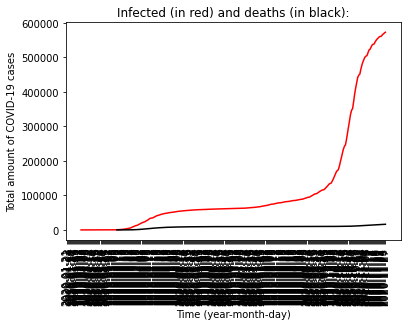

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import matplotlib.ticker as tkr
import requests

#First script

#Bring a coma separated value file

def wget(url):
    r = requests.get(url, allow_redirects=True)
    with open(url[url.rfind('/') + 1::], 'wb') as f:
        f.write(r.content)

wget ("https://covid.ourworldindata.org/data/ecdc/full_data.csv")

file = pd.read_csv("full_data.csv")
data = file.to_dict("list")

#Welcome menu

print("Amount of cases and deaths of a given country by COVID-19.")

#Safety measure

varCheck = []

for i in range(0, len(data["date"])):
    varCheck.append(data['location'][i])

setCheck = set()

for x in varCheck:
    setCheck.add(x)

listCheck = list()
listCheck = list(setCheck)

print("Possible countries:")
print(listCheck)

country = input("Type the name of a country (first letter in uppercase please): ")

#The safety measure will automatically check if the user's input is in fact a country.

if country in listCheck:
    print("Country found. Plotting data.")
else:
    z = 1
    while z == 1:
        print("Wrong.")
        country = input("Type the name of a country (first letter in uppercase please): ")
        if country in listCheck:
            print("Country found. Plotting data.")
            z = 0

#//

t1 = [data["date"][0]]
s1 = [data["total_cases"][0]]
d1 = [data["total_deaths"][0]]

#If the input country is equal to a country listed in the database, the variables above this comment will take the information (day, amount of cases and deaths).

for i in range(1, len(data["date"])):
    if country == (data["location"][i]):
        t1.append(data["date"][i])
        s1.append(data["total_cases"][i])
        d1.append(data["total_deaths"][i])

#//


plt.title('Infected (in red) and deaths (in black):')
plt.xticks(rotation=90)
plt.ylabel('Total amount of COVID-19 cases')
plt.xlabel('Time (year-month-day)')
plt.plot(t1,s1,'r-')
plt.plot(t1,d1,'k-')

plt.show()